In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from numba import njit
from tqdm.notebook import tqdm

In [10]:
plt.rcParams["figure.figsize"] = (15,5)

D = 0.3
L= 670e-9
A = 0.001
a = 0.0001
d = 0.0009

N = 100000
x = np.random.uniform(-A/2,A/2,N)
y1 = np.random.uniform(d/2-a/2,(a/2)+d/2,N)
y = y1*np.random.choice([-1,1],N)
z = np.linspace(-0.004,0.004,500)

def I(x,y,z):
    I11 = []
    f1 = np.exp(2*np.pi*1j*(2*D)/L)*np.exp((np.pi*1j*(x - y)**2)/(L*D))*np.exp((np.pi*1j*(z - y)**2)/(L*D))
    I1 = f1.mean()
    I11.append((np.abs(I1))**2)

    return I11

Ints = []

for z_i in z:
    Ints.append(I(x, y, z_i))


In [12]:
def clasico(z,y):
    theta = np.arctan(z/D)
    I_c = (np.cos((np.pi*d/L)*(np.sin(theta))))**2*(np.sinc(a*np.sin(theta)/L))**2
    return I_c
clasic_ints = []

for z_i in z:
    clasic_ints.append(clasico(z_i,y))


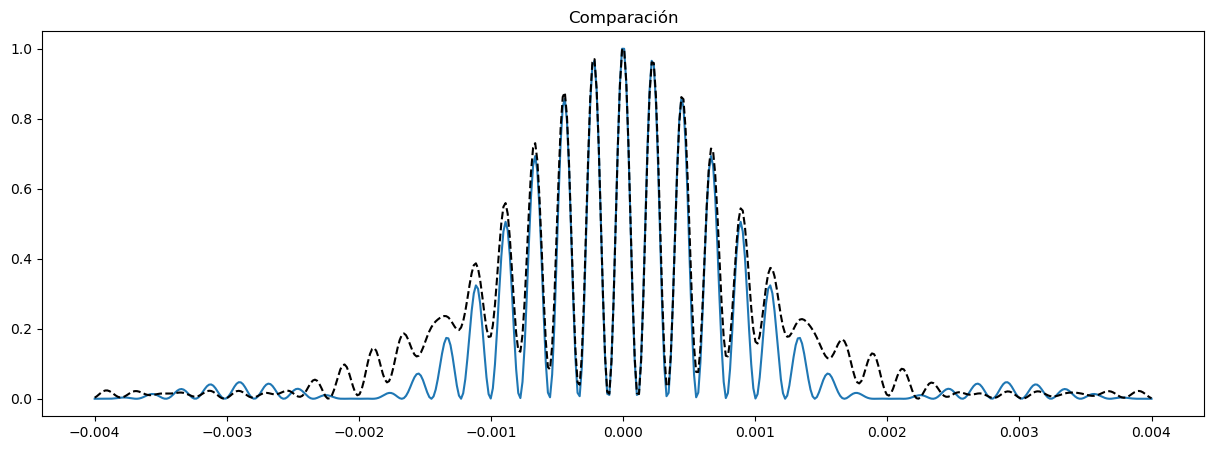

In [13]:
plt.plot(z,np.array(clasic_ints)/max(clasic_ints))
plt.plot(z,np.array(Ints)/max(Ints),c='k',ls="--")
plt.title("Comparación")
plt.show()

Los modelos clásico y de integración de caminos se asemejan bastante, aunque difieren para valores bajos de la intensidad. Esto puede ser causado por la aproximación de ángulos pequeños que se suele usar para el modelo clásico además de la consideración de la curvatura de las ondas que no se tiene en cuenta en este modelo.

# Punto 2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


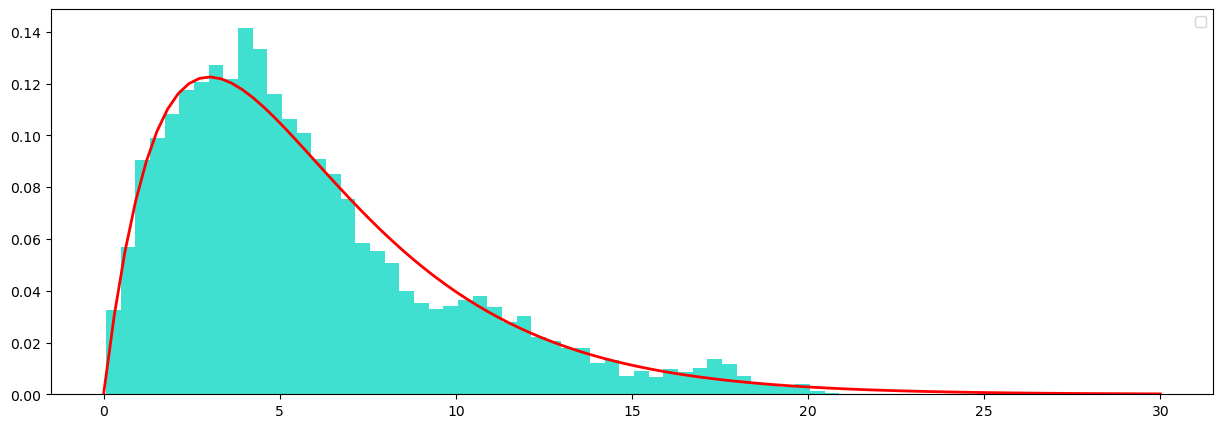

In [33]:
import scipy
from scipy.stats import gamma

alpha = 2
beta = 3
def func(x):
    return x**(alpha-1)*np.exp(-x/beta)

N = 10000
x_s = []
x_a = np.random.uniform()

for n in range(N):
    d_x = np.random.uniform(-1,1)
    xp = abs(x_a +d_x)
    f_x = func(x_a)
    fxp = func(xp)

    U = np.random.uniform(0,1)

    if U < ((fxp)/f_x):
        x_a = xp
    x_s.append(x_a)

x = np.linspace (0, 30, 100)
fig, ax = plt.subplots()
ax.hist(x_s, bins=50, density=True, alpha=1, color='turquoise')


x_teorico = np.linspace(0, 30, 100)
ax.plot(x_teorico, gamma.pdf(x_teorico, alpha, scale=beta), 'r-', lw=2)


plt.legend()
plt.show()

In [ ]:
def metropolis(N, step):
    s_x = []
    x_a = np.random.uniform(0,1)

    for n in range(N):
        d_x= np.random.uniform(-step, step)
        xp = abs(x_a + d_x)
        f_x = func(x_a)
        fxp = func(xp)
        U = np.random.uniform(0,1)
        if U < ((fxp)/f_x):
            x_a = xp
        x_s.append(x_a)

    return x_s

def fit(m):
    shape, loc, scale = gamma.fit(m, floc = 0)
    return shape, scale

n_expe = 100

e_alphas = []
e_bethas = []

max_anho_d = 1
for i in range(n_expe):
    muestras = metropolis(N, 1)
    alpha_e, betha_e = fit(muestras)
    e_alphas.append(alpha_e)
    e_bethas.append(betha_e)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.hist(e_alphas, bins=20, density=True, alpha=1 , color='b')
ax1.axvline(alpha, color='r', linestyle='dashed', linewidth=2)
ax1.set_title('Estimaciones del parámetro alpha')

ax2.hist(e_bethas, bins=20, density=True, alpha=0.6, color='g')
ax2.axvline(beta, color='r', linestyle='dashed', linewidth=2)
ax2.set_title('Estimaciones del parámetro beta')

plt.show()

Si se cambia el ancho de distribución de perturbación del Metrópolis, si cambian los histogramas. Se observa que el ancho presenta más inferencia en el histograma de bethea. Estos cambios en los histogramas son generados porque, al aumentar la perturbación se obtendran valores que se alejan de los valores de alpha y betha propuestos. Si se disminuye el rango de perturbación se obtendran valores experimentales cercanos a betha y al alpha que fueron definidos al principio.

# Punto 3

MovieWriter imagemagick unavailable; using Pillow instead.


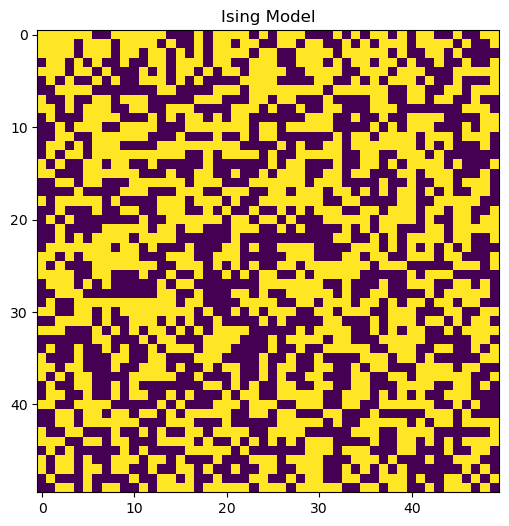

In [16]:
def E(U,i,j,J,N):
    return -J*np.sum(U[i,j]*U[np.mod(i+1,N),j] + U[i,j]*U[i,np.mod(j+1,N)] + U[i,j]*U[np.mod(i-1,N),j] + U[i,np.mod(j-1,N)])

N = 50
U = np.random.choice([-1, 1], size=(N, N))

def dE(N,J,B,U):
    i = np.random.choice(list(range(N)))%N
    j = np.random.choice(range(N))%N
    E_old = E(U, i,j,J,N) + E(U,np.mod(i+1,N),j,J,N) + E(U,np.mod(i-1,N),j,J,N) + E(U,i,np.mod(j+1,N),J,N) + E(U,i,np.mod(j-1,N),J,N) 
    U[i,j] = -U[i,j]
    E_new = E(U, i,j,J,N) + E(U,np.mod(i+1,N),j,J,N) + E(U,np.mod(i-1,N),j,J,N) + E(U,i,np.mod(j+1,N),J,N) + E(U,i,np.mod(j-1,N),J,N)
    Energia = E_new - E_old
    return [Energia, U]

B = 10
J = 0.2

def act_U(N,J,B,U):
    DE = dE(N,J,B,U) 
    if DE[0]<= 0:
        DE = dE(N,J,B,U)
        U = DE[1]
    elif DE[0] > 0:
        u = np.random.uniform(0,1)
        if u <= np.exp(-B*DE[0]):
            U = DE[1]
    return U

it = 400


fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(U, cmap='viridis') 
ax.set_title('Ising Model')

def update(*args):
    global U
    for i in range(it):
        U = act_U(N,J,B,U)
    im.set_array(U)
    return [im]
anim =animation.FuncAnimation(fig,update, frames = 500, interval = 50)
anim.save('ising.gif',writer = 'imagemagick')
anim

In [17]:
output_folder = 'frames'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

fig, ax = plt.subplots(figsize=(8, 6))
for frame in range(500):  
    for _ in range(400):
        U = act_U(N, J, B, U)
    plt.imshow(U, cmap='viridis')
    plt.title('Ising Model')
    plt.axis('off') 
    plt.savefig(f"{output_folder}/{frame:03d}.png", bbox_inches='tight')
    plt.close()

os.system("ffmpeg -y -hide_banner -loglevel panic -framerate 60 -pattern_type glob -i 'frames/*.png' -vf pad='width=ceil(iw/2)*2:height=ceil(ih/2)*2' -c:v libx264 -pix_fmt yuv420p video.mp4")
print("Vídeo generado: video.mp4")

Vídeo generado: video.mp4


In [18]:
from IPython.display import Video

# Mostrar el video dentro de Jupyter
Video("video.mp4", embed=True)

# Punto 4

In [19]:
import pandas as pd
import re
df = pd.read_csv("https://www.gutenberg.org/cache/epub/1661/pg1661.txt", delimiter="\t")
df = df.replace("\r\n","\n").replace("\n\n","#").replace("#","\n\n").replace("'", "").replace('"', "").replace("_", "")
df = df.replace(r'\s+', ' ')
df = df.applymap(lambda x: x.lower())

In [20]:
from itertools import combinations
df = pd.read_csv("https://www.gutenberg.org/cache/epub/1661/pg1661.txt", delimiter="\t")
df = df.replace("\r\n","\n").replace("\n\n","#").replace("#","\n\n").replace("'", "").replace('"', "").replace("_", "")
df = df.replace(r'\s+', ' ')
df = df.applymap(lambda x: x.lower())

atoms = df
abc = list('abcdefghijklmnoprstuvwxyz')
punt = list(".,!?")
s_chars = [' ', '\n']
chars = abc + punt + s_chars


In [22]:
def ngramas(atoms,n):
    ngrama = []
    for i in range(len(atoms)-n-1):
        grm = atoms[i:i+n]
        ngrama.append(grm)
    return ngrama

def Matriz_F(ngram, df,n):
    df = list(df)
    F = pd.DataFrame(np.zeros((len(chars), len(ngram)),dtype=int), index=chars, columns=ngram)
    for i in range(int(len(ngram))-1):
        F.loc[df[i],df[i+1]] +=1
    return F

def text(F,ng):  
    P = F/F.sum(axis=1).values[:,None]
    ngrama_i = np.random.choice(ng)
    m = 1500
    for caract in range(m):
        nueva_letra = np.random.choice(P.index, p=P.loc[:, ngrama_i])
        ngrama_i = ngrama_i[1:] + nueva_letra
        
    return ngrama_i

ng = ngramas(atoms,3)
F = Matriz_F(ng,df,3)
texto = text(F,ng)
print(F)

ValueError: Shape of passed values is (31, 9616), indices imply (31, 1)

# Punto 5

# 5.1

In [28]:
from scipy.integrate import solve_ivp

A = 1000
B = 20
t_U = 23.4 * 24 / 60  
t_Np = 2.36           
L_u = 1/t_U           
L_np = 1/t_Np       
U = 0
Np = 0
Pu = 0
ds = 30  
it = 1000  

U_evol = []
Np_evol = []
Pu_evol = []

def E(U, Np, Pu):
    return A * np.log(1 + U) - L_u * U - L_np * Np - B * Pu

for d in range(ds):
    for _ in range(it):
        act = np.array([U, Np, Pu])
        E_act = E(U, Np, Pu)
        estado = act + np.random.normal(0, 1, 3)
        estado = np.maximum(estado, 0) 
        U_new, Np_new, Pu_new = estado
        prop_E = E(U_new, Np_new, Pu_new)

        if np.random.rand() < np.exp(prop_E - E_act):
            U, Np, Pu = U_new, Np_new, Pu_new

    U_evol.append(U)
    Np_evol.append(Np)
    Pu_evol.append(Pu)
    

MovieWriter imagemagick unavailable; using Pillow instead.


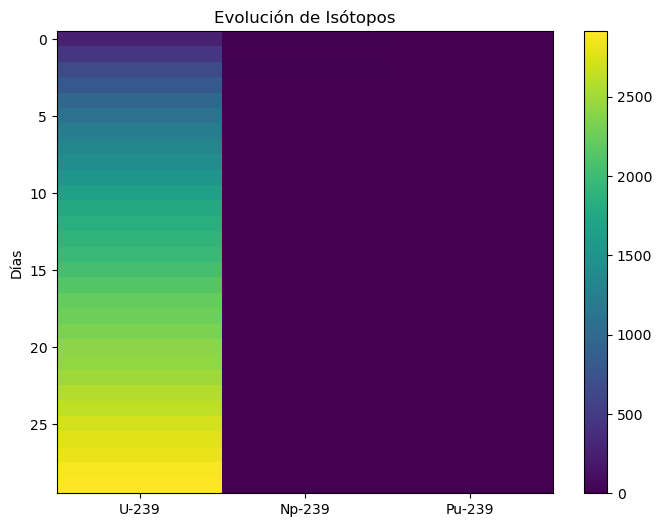

In [29]:
def sist_ed(t, y):
    U, Np, Pu = y
    dU_dt = -L_u * U  
    dNp_dt = L_u * U - L_np * Np  
    dPu_dt = L_np * Np 

    return [dU_dt, dNp_dt, dPu_dt]

cond_ini = [U_evol[0], Np_evol[0], Pu_evol[0]]
sol = solve_ivp(sist_ed, [0, 100],cond_ini, method='RK45', dense_output=True)
U_estable, Np_estable, Pu_estable = sol.y[:, -1]
epsilon = 1e-4 
t_estable = None  
for i, t in enumerate(sol.t):
    dU_dt, dNp_dt, dPu_dt = sist_ed(t, sol.y[:, i])
    if abs(dU_dt) < epsilon and abs(dNp_dt) < epsilon and abs(dPu_dt) < epsilon:
        t_estable = t
        break


if t_estable is not None:
    print(f"Estado estable\nU-239: {U_estable:.4f}, Np-239: {Np_estable:.4f}, Pu-239: {Pu_estable:.4f}")
    print(f"Tiempo estado estable: {t_estable:.2f} días")

evols = np.array([U_evol, Np_evol, Pu_evol]).T

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(evols, cmap='viridis', interpolation='nearest', aspect='auto')
ax.set_title('Evolución de Isótopos')
ax.set_ylabel('Días')
ax.set_xticks([0, 1, 2]) 
ax.set_xticklabels(['U-239', 'Np-239', 'Pu-239']) 
fig.colorbar(im, ax=ax, orientation='vertical')

def update(frame):
    evol_frame = evols[:frame + 1, :]
    im.set_array(evol_frame)
    return [im]

ani = animation.FuncAnimation(fig, update, frames=ds, interval=200, blit=True)
ani.save('evolucion_isotopos.gif', writer='imagemagick')
plt.show()

# 5.2 - a

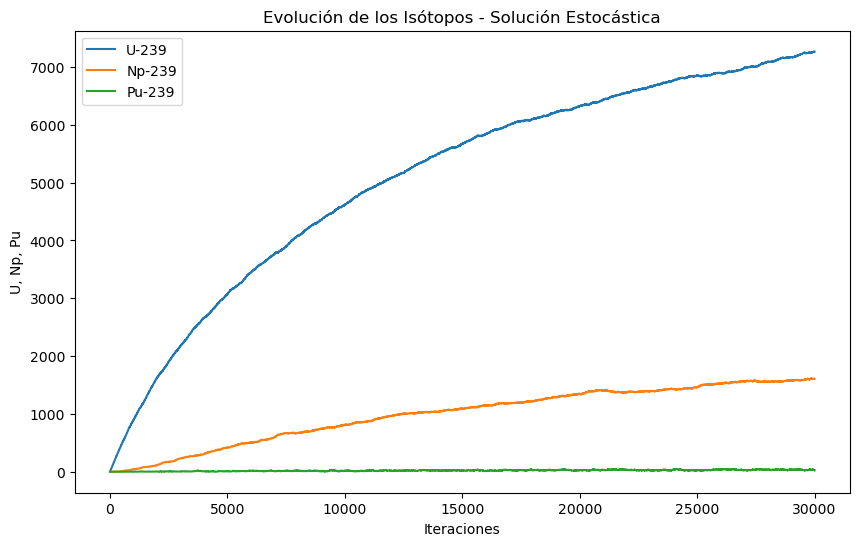

In [30]:
A = 1000
B = 20
t_U = 23.4*24/60
t_Np = 2.36        
L_u = 1/t_U       
L_np = 1/t_Np        
U = 0
Np = 0
Pu = 0
ds = 30 
it = 1000 

Y = [U, Np, Pu]
R = np.array([[1, 0, 0], 
              [-1, 1, 0], 
              [0, -1, 1], 
              [0, 0, -1]])
t = 0
r_evol = []

for d in range(ds):
    for _ in range(it):
        T = np.array([A, L_u*Y[0],L_np*Y[1], B*Y[2]])

        tau_new = np.random.exponential(1 / T.sum())
        r = np.random.choice(range(len(R)), p=T / T.sum())    
        Y_new = Y + R[r]
        t_new = t + tau_new
        r_evol.append(Y_new)
        t = t_new
        Y = Y_new

r_evol = np.array(r_evol)

plt.figure(figsize=(10, 6))
plt.plot(r_evol)
plt.xlabel("Iteraciones")
plt.ylabel("U, Np, Pu")
plt.title("Evolución de los Isótopos - Solución Estocástica")
plt.legend(['U-239', 'Np-239', 'Pu-239'])
plt.show()

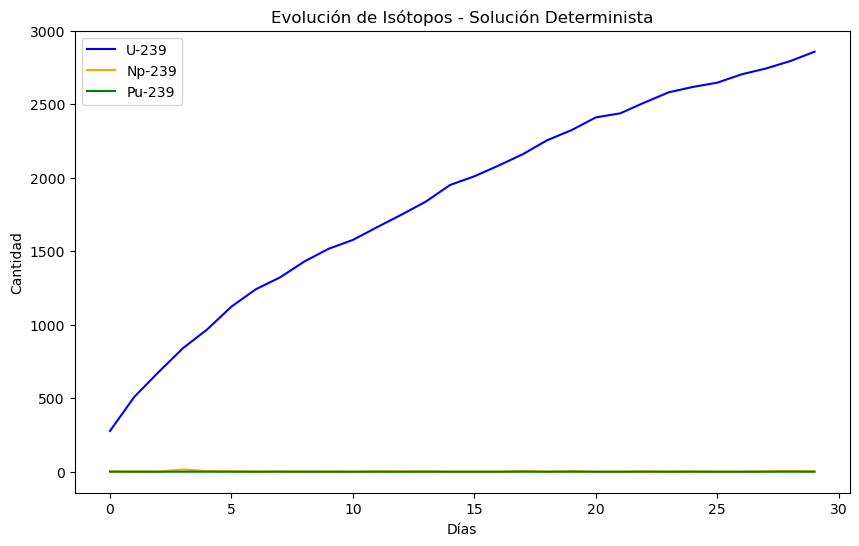

In [31]:
U_evol = []
Np_evol = []
Pu_evol = []

def E(U, Np, Pu):
    return A*np.log(1 + U) - L_u*U - L_np*Np - B*Pu

for d in range(ds):
    for _ in range(it):
        act = np.array([U, Np, Pu])
        E_act = E(U, Np, Pu)
      
        estado = act + np.random.normal(0, 1, 3)
        estado = np.maximum(estado, 0)
        U_new, Np_new, Pu_new = estado
        prop_E = E(U_new, Np_new, Pu_new)
        if np.random.rand() < np.exp(prop_E - E_act):
            U, Np, Pu = U_new, Np_new, Pu_new

    U_evol.append(U)
    Np_evol.append(Np)
    Pu_evol.append(Pu)

dias = np.arange(ds)

plt.figure(figsize=(10, 6))
plt.plot(dias, U_evol, label="U-239", color='blue')
plt.plot(dias, Np_evol, label="Np-239", color='orange')
plt.plot(dias, Pu_evol, label="Pu-239", color='green')
plt.xlabel("Días")
plt.ylabel("Cantidad")
plt.title("Evolución de Isótopos - Solución Determinista")
plt.legend()
plt.show()

# 5.2 - b

In [32]:
num_sim = 100
count_80 = 0

for sim in range(num_sim):
    U = 0
    Np = 0
    Pu = 0
    Y = np.array([U, Np, Pu])  
    R = np.array([[1, 0, 0],  
                  [-1, 1, 0],  
                  [0, -1, 1],  
                  [0, 0, -1]])  

    t = 0  
    for d in range(ds):
        for _ in range(it):
            T = np.array([A, L_u*Y[0], L_np*Y[1], B*Y[2]])

            tau_new = np.random.exponential(1/T.sum())
            r_index = np.random.choice(range(len(R)), p=T/T.sum())
            Y_new = Y + R[r_index]
            Y_new = np.maximum(Y_new, 0)
            t += tau_new
            Y = Y_new
    if Y[2] >= 80: 
        count_80 += 1

p80 = count_80/num_sim

print(f"Probabilidad de que el nivel de Pu sea igual o mayor que 80: {p80:.2f}")

Probabilidad de que el nivel de Pu sea igual o mayor que 80: 0.00
